In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

In [318]:
SCK1 = pd.read_csv('Apr15reesewindtest_SCK1.csv')
SCK2 = pd.read_csv('Apr15reesewindtest_SCK2.csv')
SCK3 = pd.read_csv('Apr15reesewindtest_SCK3.csv')
WS = pd.read_csv('Fan_Test_Apr15.csv',skiprows=[0,2,3])

In [319]:
print SCK1.shape
print SCK2.shape
print SCK3.shape
print WS.shape

(10739, 9)
(12030, 9)
(10368, 9)
(175, 4)


In [320]:
def status(array):
    print 'Start =',min(array),'  End =',max(array),'  Length =', len(array)

In [321]:
status(SCK1[' UTC'][7:]) # seconds between on and when it was programmed
status(SCK2[' UTC'][:])
status(SCK3[' UTC'][7:])
status(WS['TIMESTAMP'][:]) # time when it was turned on, needs to be adjusted

Start = 2016-04-15 11:11:10   End = 2016-04-15 14:34:33   Length = 10732
Start = 2016-04-15 11:13:00   End = 2016-04-15 14:34:15   Length = 12030
Start = 2016-04-15 11:14:18   End = 2016-04-15 14:33:56   Length = 10361
Start = 2016-04-15 13:49:30   End = 2016-04-15 14:18:30   Length = 175


In [322]:
SCK1time = pd.to_datetime(SCK1[' UTC'])
SCK2time = pd.to_datetime(SCK2[' UTC'])
SCK3time = pd.to_datetime(SCK3[' UTC'])

In [323]:
# Time adjust to make them match almost exactly on the second to the computer

SCK1new = []
for i in range(0,len(SCK1time)):
    ddt = datetime.datetime.strptime(str(SCK1time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-16)
    SCK1new = np.append(adj,SCK1new)
SCK1new = SCK1new[::-1]

SCK2new = []
for i in range(0,len(SCK2time)):
    ddt = datetime.datetime.strptime(str(SCK2time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-13)
    SCK2new = np.append(adj,SCK2new)
SCK2new = SCK2new[::-1]

SCK3new = []
for i in range(0,len(SCK3time)):
    ddt = datetime.datetime.strptime(str(SCK3time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-13)
    SCK3new = np.append(adj,SCK3new)
SCK3new = SCK3new[::-1]

In [324]:
SCK1 = SCK1[7:]
SCK2 = SCK2[:]
SCK3 = SCK3[7:]

In [325]:
SCK1new = SCK1new[7:]
SCK2new = SCK2new[:]
SCK3new = SCK3new[7:]

In [326]:
# NOW RESAMPLE TIME
SCK1.index = pd.date_range(min(SCK1new),periods=len(SCK1new),freq='1S')
SCK2.index = pd.date_range(min(SCK2new),periods=len(SCK2new),freq='1S')
SCK3.index = pd.date_range(min(SCK3new),periods=len(SCK3new),freq='1S')

In [327]:
SCK1_rs = SCK1.resample('25S', how='mean')
SCK2_rs = SCK2.resample('25S', how='mean')
SCK3_rs = SCK3.resample('25S', how='mean')

In [328]:
ts1 = []
for i in SCK1_rs.index:
    ts1 = np.append((i),ts1)
ts1 = ts1[::-1]

ts2 = []
for i in SCK2_rs.index:
    ts2 = np.append((i),ts2)
ts2 = ts2[::-1]

ts3 = []
for i in SCK3_rs.index:
    ts3 = np.append((i),ts3)
ts3 = ts3[::-1]

In [329]:
status(ts1)
print type(ts1[0])

Start = 2016-04-15 11:10:50   End = 2016-04-15 14:09:35   Length = 430
<class 'pandas.tslib.Timestamp'>


In [330]:
status(SCK1new[1743:2222])
status(SCK2new[1812:2291])
status(SCK3new[1648:2126])

Start = 2016-04-15 11:43:01   End = 2016-04-15 11:51:00   Length = 479
Start = 2016-04-15 11:43:01   End = 2016-04-15 11:51:00   Length = 479
Start = 2016-04-15 11:43:01   End = 2016-04-15 11:51:00   Length = 478


In [331]:
SCK1newb = SCK1new[1743:2222]
SCK2newb = SCK2new[1812:2291]
SCK3newb = SCK3new[1648:2126]

In [332]:
SCK1b = SCK1[1743:2222]
SCK2b = SCK2[1812:2291]
SCK3b = SCK3[1648:2126]

In [355]:
xfmt = mdates.DateFormatter('%H:%M')

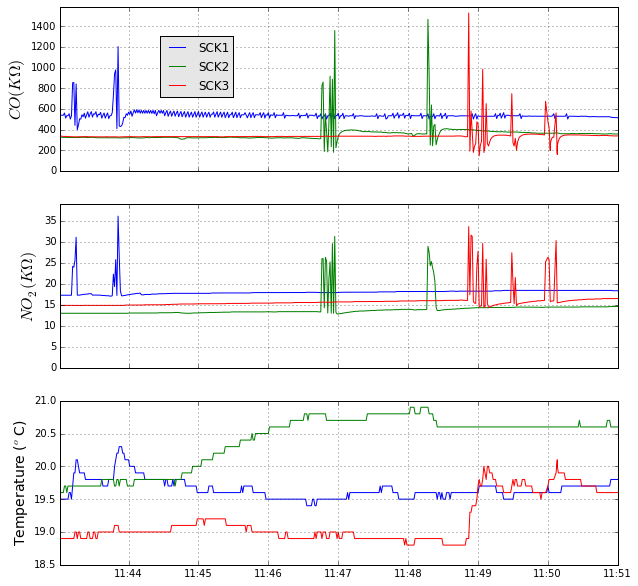

In [423]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax1.plot(SCK1newb,SCK1b[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(SCK2newb,SCK2b[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(SCK3newb,SCK3b[' Carbon Monxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
#ax1.set_title('Effect of Instantaneous High Velocity Air On Raw SCK Data', fontsize=12)
legend = ax1.legend(loc=[0.18,0.45],fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('0.90')

ax1.set_ylim(0,1590)
ax1.xaxis.set_ticklabels('')
ax1.grid()
ax2 = fig.add_subplot(312)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax2.plot(SCK1newb,SCK1b[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(SCK2newb,SCK2b[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(SCK3newb,SCK3b[' Nitrogen Dioxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.set_ylim(0,39)
ax2.xaxis.set_ticklabels('')
ax2.grid()
ax3 = fig.add_subplot(313)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax3.plot(SCK1newb,SCK1b['Temperature ( C) '],label='SCK1')
ax3.plot(SCK2newb,SCK2b['Temperature ( C) '],label='SCK2')
ax3.plot(SCK3newb,SCK3b['Temperature ( C) '],label='SCK3') # take out first 3 rows: error
ax3.set_ylabel('Temperature ($^o$C)', fontsize=14)
ax3.grid()

plt.savefig('Windtest_inst.png', format='png', dpi=300)

In [335]:
status(ts1[77:97])
status(ts2[73:93])
status(ts3[70:90])

Start = 2016-04-15 11:42:55   End = 2016-04-15 11:50:50   Length = 20
Start = 2016-04-15 11:42:55   End = 2016-04-15 11:50:50   Length = 20
Start = 2016-04-15 11:42:55   End = 2016-04-15 11:50:50   Length = 20


In [336]:
ts1d = ts1[77:97]
ts2d = ts2[73:93]
ts3d = ts3[70:90]

In [337]:
SCK1d = SCK1_rs[77:97]
SCK2d = SCK2_rs[73:93]
SCK3d = SCK3_rs[70:90]

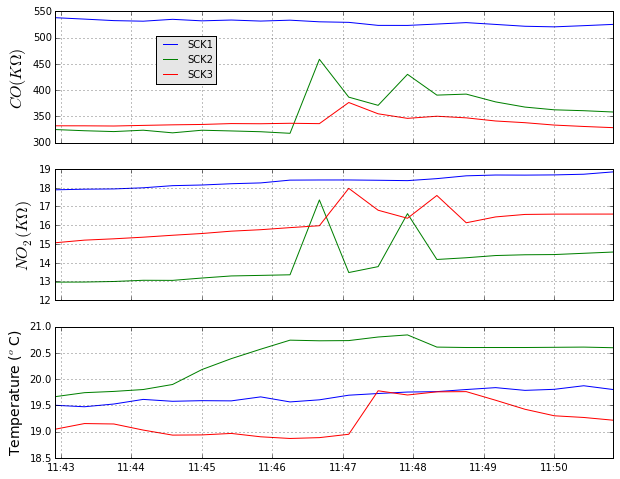

In [402]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(311)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax1.plot(ts1d,SCK1d[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(ts2d,SCK2d[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(ts3d,SCK3d[' Carbon Monxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
#ax1.set_title('Effect of Instantaneous High Velocity Air On Raw SCK Data', fontsize=16)
legend = ax1.legend(loc=[0.18,0.45],fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('0.90')

ax1.xaxis.set_ticklabels('')
ax1.grid()

ax2 = fig.add_subplot(312)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax2.plot(ts1d,SCK1d[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(ts2d,SCK2d[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(ts3d,SCK3d[' Nitrogen Dioxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.xaxis.set_ticklabels('')
ax2.grid()
ax3 = fig.add_subplot(313)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax3.plot(ts1d,SCK1d['Temperature ( C) '],label='SCK1')
ax3.plot(ts2d,SCK2d['Temperature ( C) '],label='SCK2')
ax3.plot(ts3d,SCK3d['Temperature ( C) '],label='SCK3') # take out first 3 rows: error
ax3.set_ylabel('Temperature ($^o$C)', fontsize=14)
ax3.grid()

#plt.savefig('SCK_Mar14COtest.eps', format='eps', dpi=1200)

In [339]:
status(SCK1new[2222:4495])
status(SCK2new[2291:4632])
status(SCK3new[2126:4460])

Start = 2016-04-15 11:51:01   End = 2016-04-15 12:30:04   Length = 2273
Start = 2016-04-15 11:51:01   End = 2016-04-15 12:30:04   Length = 2341
Start = 2016-04-15 11:51:01   End = 2016-04-15 12:30:04   Length = 2334


In [340]:
SCK1neww = SCK1new[2222:4495]
SCK2neww = SCK2new[2291:4632]
SCK3neww = SCK3new[2126:4460]

In [341]:
SCK1w = SCK1[2222:4495]
SCK2w = SCK2[2291:4632]
SCK3w = SCK3[2126:4460]

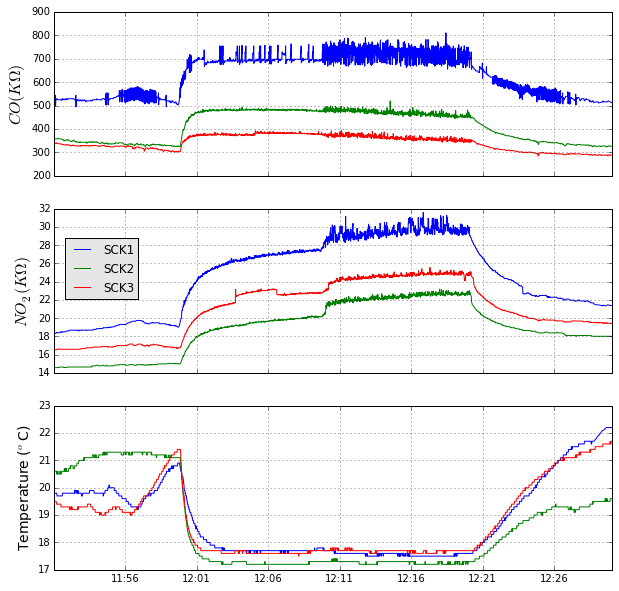

In [421]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax1.plot(SCK1neww,SCK1w[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(SCK2neww,SCK2w[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(SCK3neww,SCK3w[' Carbon Monxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
#ax1.set_title('Effect of Controlled Air Flow On Raw SCK Data', fontsize=16)
ax1.xaxis.set_ticklabels('')
ax1.grid()
ax2 = fig.add_subplot(312)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax2.plot(SCK1neww,SCK1w[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(SCK2neww,SCK2w[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(SCK3neww,SCK3w[' Nitrogen Dioxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
legend = ax2.legend(loc=[0.02,0.45],fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax2.xaxis.set_ticklabels('')
ax2.grid()
ax3 = fig.add_subplot(313)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax3.plot(SCK1neww,SCK1w['Temperature ( C) '],label='SCK1')
ax3.plot(SCK2neww,SCK2w['Temperature ( C) '],label='SCK2')
ax3.plot(SCK3neww,SCK3w['Temperature ( C) '],label='SCK3') # take out first 3 rows: error
ax3.set_ylabel('Temperature ($^o$C)', fontsize=14)
ax3.grid()

#plt.savefig('Windtest_flow.png', format='png', dpi=300)

In [343]:
status(ts1[97:191])
status(ts2[93:187])
status(ts3[90:184])

Start = 2016-04-15 11:51:15   End = 2016-04-15 12:30:00   Length = 94
Start = 2016-04-15 11:51:15   End = 2016-04-15 12:30:00   Length = 94
Start = 2016-04-15 11:51:15   End = 2016-04-15 12:30:00   Length = 94


In [344]:
ts1c = ts1[97:191]
ts2c = ts2[93:187]
ts3c = ts3[90:184]

In [345]:
SCK1c = SCK1_rs[97:191]
SCK2c = SCK2_rs[93:187]
SCK3c = SCK3_rs[90:184]

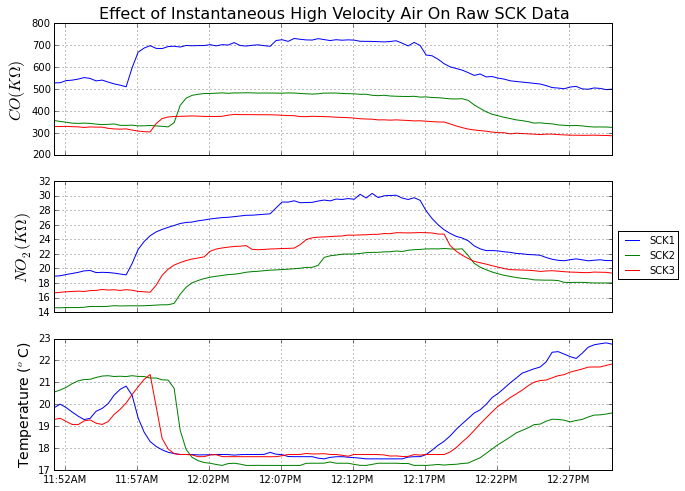

In [348]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(311)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax1.plot(ts1c,SCK1c[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(ts2c,SCK2c[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(ts3c,SCK3c[' Carbon Monxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
ax1.set_title('Effect of Instantaneous High Velocity Air On Raw SCK Data', fontsize=16)
ax1.legend(loc=[1.01,-0.95],fontsize=10)
ax1.xaxis.set_ticklabels('')
ax1.grid()
ax2 = fig.add_subplot(312)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax2.plot(ts1c,SCK1c[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(ts2c,SCK2c[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(ts3c,SCK3c[' Nitrogen Dioxide ( kOhm) '],label='SCK3') # take out first 3 rows: error
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.xaxis.set_ticklabels('')
ax2.grid()
ax3 = fig.add_subplot(313)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax3.plot(ts1c,SCK1c['Temperature ( C) '],label='SCK1')
ax3.plot(ts2c,SCK2c['Temperature ( C) '],label='SCK2')
ax3.plot(ts3c,SCK3c['Temperature ( C) '],label='SCK3') # take out first 3 rows: error
ax3.set_ylabel('Temperature ($^o$C)', fontsize=14)
ax3.grid()

#plt.savefig('Wind_constflow.eps', format='eps', dpi=1200)